In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [18]:
df = pd.read_csv('/content/acc_gyr.csv')

In [19]:
df.head ()


,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall


In [32]:
df.label.unique()

array(['fall', 'rfall', 'lfall', 'light', 'sit', 'walk', 'step'],
      dtype=object)

In [21]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96800 entries, 0 to 96799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xAcc    96800 non-null  float64
 1   yAcc    96800 non-null  float64
 2   zAcc    96800 non-null  float64
 3   xGyro   96800 non-null  float64
 4   yGyro   96800 non-null  float64
 5   zGyro   96800 non-null  float64
 6   label   96800 non-null  object 
dtypes: float64(6), object(1)
memory usage: 5.2+ MB


<Axes: xlabel='count', ylabel='label'>

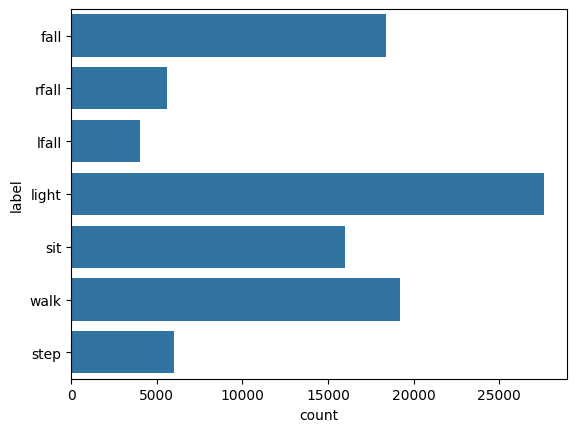

In [22]:
import seaborn as sns
sns.countplot(df.label)

In [23]:
pd.get_dummies(df, columns=['label'])

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label_fall,label_lfall,label_light,label_rfall,label_sit,label_step,label_walk
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,True,False,False,False,False,False,False
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,True,False,False,False,False,False,False
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,True,False,False,False,False,False,False
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,True,False,False,False,False,False,False
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96795,7.30,-1.16,-4.58,18.19,3.60,-35.77,False,False,True,False,False,False,False
96796,7.39,-0.37,-5.05,20.08,0.06,-34.55,False,False,True,False,False,False,False
96797,7.52,-1.46,-5.82,22.58,0.12,-28.02,False,False,True,False,False,False,False
96798,7.58,-2.14,-6.31,19.47,2.44,-22.52,False,False,True,False,False,False,False


In [24]:
df.describe()

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro
count,96800.000000,96800.000000,96800.000000,96800.000000,96800.000000,96800.000000
mean,7.201229,-1.341302,-3.059421,-1.226996,-0.231135,0.121116
std,3.009094,3.049660,5.368511,35.448655,25.118186,29.100135
min,-39.240000,-39.240000,-39.240000,-483.400000,-437.810000,-354.000000
25%,5.740000,-2.900000,-6.260000,-13.670000,-6.160000,-11.410000
50%,7.040000,-1.310000,-4.920000,-0.490000,0.370000,-0.920000
75%,8.390000,0.350000,-2.410000,11.780000,7.450000,12.820000
max,39.240000,39.240000,39.240000,439.390000,317.380000,304.870000


finding the  OUTLIERS

In [25]:
df['xAcc'].skew()

np.float64(1.0680166833038318)

In [26]:
from sklearn.model_selection import train_test_split

X = df[['xAcc', 'yAcc', 'zAcc', 'xGyro', 'yGyro', 'zGyro']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-1237305135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['zAcc'])


<Axes: xlabel='zAcc', ylabel='Density'>

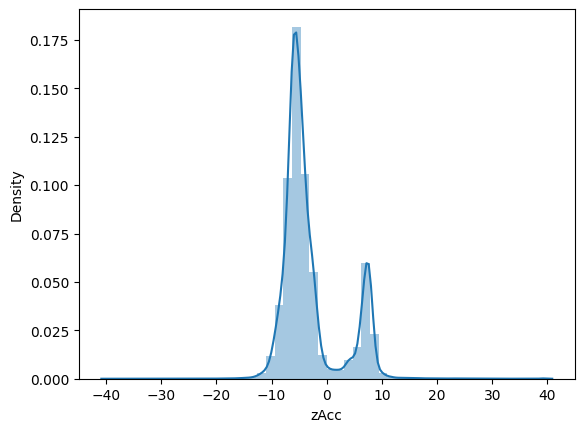

In [27]:
sns.distplot(df['zAcc'])

In [28]:
y.sample()

,label
11766,fall


In [29]:

X_train


,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro
7266,6.40,-2.22,-7.33,-22.58,-6.84,-6.23
71606,5.51,0.09,-6.10,6.84,4.03,6.84
7978,6.45,0.70,7.46,0.00,0.06,-1.04
59684,6.16,1.11,-4.71,-24.41,-4.09,16.17
69565,7.75,2.23,-5.17,-22.09,-12.27,14.77
...,...,...,...,...,...,...
6265,5.97,-1.13,7.88,-0.55,0.24,-0.92
54886,6.87,-0.69,-5.87,11.05,-3.60,-9.40
76820,6.40,0.73,-4.45,-11.78,-2.62,1.28
860,4.26,-1.44,-3.36,11.72,-2.93,-11.35


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5) # Using 5 folds for cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.50914256 0.5509814  0.54684917 0.57474174 0.55036157]
Mean cross-validation accuracy: 0.5464152892561984


In [30]:
# Remove outliers using the percentile method
numerical_cols = ['xAcc', 'yAcc', 'zAcc', 'xGyro', 'yGyro', 'zGyro']

for col in numerical_cols:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers removed using percentile method.")

Outliers removed using percentile method.


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5) # Using 5 folds for cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.50914256 0.5509814  0.54684917 0.57474174 0.55036157]
Mean cross-validation accuracy: 0.5464152892561984


In [38]:
# Example of manual data for prediction (replace with your actual data)
manual_data = [[7.0, 0.5, 7.0, 2.0, 3.0, 2.0]]

# Convert manual data to a pandas DataFrame (important for consistent input format)
manual_df = pd.DataFrame(manual_data, columns=['xAcc', 'yAcc', 'zAcc', 'xGyro', 'yGyro', 'zGyro'])

# Make a prediction using the trained model
prediction = rf_clf.predict(manual_df)

print("Prediction for manual data:", prediction)

Prediction for manual data: ['fall']


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf_clf, 'random_forest_model.pkl')

In [44]:
import joblib

# Save the trained model with a high compression level
joblib.dump(rf_clf, 'random_forest_model_compressed_high.pkl', compress=9)

['random_forest_model_compressed_high.pkl']